# Autoencoder trained in tag 2 version 2
John Ignacio R.M. 2020-06-10

This time a new model is going to be trained, one that does not overfit and obtains better evaluation metrics.

In [1]:
#ada
ada_parent_dir = "../"
import sys
sys.path.append(ada_parent_dir)
from ada import get_trainvaltest_from_csv, KerasModel

#libs
import pandas as pd
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Input, Dense, Dropout
from keras.models import Model
from keras.regularizers import l1
from keras.optimizers import adam

Welcome to JupyROOT 6.20/04
Using TensorFlow backend.


In [2]:
data_path = "../processed_data"
signal = "Xtohh2000"
seed = 420

In [3]:
sets = get_trainvaltest_from_csv(data_path, signal, .6, .2, .2, seed, region = "SR", tag = 2)

In [4]:
x_train, x_val, x_test = sets["x"].values()
y_train, y_val, y_test = sets["y"].values()
w_train, w_val, w_test = sets["w"].values()
print(x_train.shape, x_val.shape, x_test.shape)

(5241, 14) (1748, 14) (1748, 14)


In [5]:
#dividing the classes
x_train_0 = x_train[y_train == 0]
x_train_1 = x_train[y_train == 1]
w_train_0 = w_train[(y_train == 0).ravel()]
w_train_1 = w_train[(y_train == 1).ravel()]

x_val_0 = x_val[y_val == 0]
x_val_1 = x_val[y_val == 1]
w_val_0 = w_val[(y_val == 0).ravel()]
w_val_1 = w_val[(y_val == 1).ravel()]

x_test_0 = x_test[y_test == 0]
x_test_1 = x_test[y_test == 1]
w_test_0 = w_test[(y_test == 0).ravel()]
w_test_1 = w_test[(y_test == 1).ravel()]

print(x_train_1.shape, x_val_1.shape, x_test_1.shape)

(5138, 14) (1702, 14) (1720, 14)


In [6]:
class KerasAutoencoder2(KerasModel):

    def __init__(self, n_features):
        input_layer = Input(shape=(n_features, ))
        encoder_1 = Dense(8, activation="relu", activity_regularizer=l1(1e-2))(input_layer)
        drop_1 = Dropout(rate=0.1)(encoder_1)
        encoder_2 = Dense(4, activation="relu")(drop_1)
        drop_2 = Dropout(rate=0.1)(encoder_2)
        latent = Dense(2, activation="relu")(drop_2)
        drop_3 = Dropout(rate=0.1)(latent)
        decoder_1 = Dense(4, activation="relu")(drop_3)
        drop_4 = Dropout(rate=0.1)(decoder_1)
        decoder_2 = Dense(8, activation="relu")(drop_4)
        drop_5 = Dropout(rate=0.1)(decoder_2)
        output_layer = Dense(n_features, activation="sigmoid")(drop_5)
        self.model = Model(inputs=input_layer, outputs=output_layer)

        #compile
        self.model.compile(loss='mean_squared_error', optimizer=adam(lr=0.01), metrics = ["acc"])

        #title
        self.title = 'optimizer: adam , lr = 0.01, loss = mean squared error'

        #training
        self.history = None

        #name
        self.model_name = "KA2"

Train on 5138 samples, validate on 1702 samples
Epoch 1/50
5138/5138 [==============================] - 1s 264us/step - loss: 0.1209 - acc: 0.0650 - val_loss: 0.0014 - val_acc: 0.0176
Epoch 2/50
5138/5138 [==============================] - 1s 167us/step - loss: 0.0012 - acc: 0.0599 - val_loss: 0.0013 - val_acc: 0.0570
Epoch 3/50
5138/5138 [==============================] - 1s 171us/step - loss: 0.0011 - acc: 0.0662 - val_loss: 0.0013 - val_acc: 0.0570
Epoch 4/50
5138/5138 [==============================] - 1s 160us/step - loss: 0.0011 - acc: 0.0547 - val_loss: 0.0013 - val_acc: 0.0570
Epoch 5/50
5138/5138 [==============================] - 1s 163us/step - loss: 0.0011 - acc: 0.0572 - val_loss: 0.0012 - val_acc: 0.0570
Epoch 6/50
5138/5138 [==============================] - 1s 160us/step - loss: 0.0011 - acc: 0.0596 - val_loss: 0.0012 - val_acc: 0.0570
Epoch 7/50
5138/5138 [==============================] - 1s 167us/step - loss: 0.0011 - acc: 0.0598 - val_loss: 0.0012 - val_acc: 0.0570


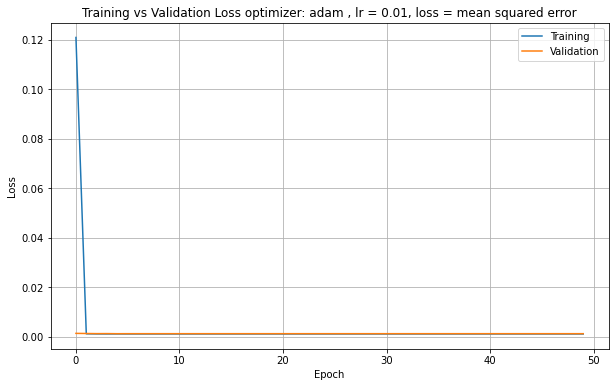

In [11]:
autoencoder_2 = KerasAutoencoder2(x_train_1.shape[1])
autoencoder_2.fit(x_train_1, x_train_1, w_train_1, x_val_1, x_val_1, w_val_1, 50)
autoencoder_2.plot_loss()

In [12]:
autoencoder_2.model.evaluate(x_test_1, x_test_1, batch_size=128)

1720/1720 [==============================] - 0s 18us/step


[1.0213971831077753, 0.04593023285269737]

In [25]:
class KerasAutoencoder3(KerasModel):

    def __init__(self, n_features):
        input_layer = Input(shape=(n_features, ))
        encoder_1 = Dense(8, kernel_initializer='uniform',activation='relu')(input_layer)
        drop_1 = Dropout(rate=0.2)(encoder_1)
        encoder_2 = Dense(4, kernel_initializer='uniform',activation='relu')(drop_1)
        drop_2 = Dropout(rate=0.2)(encoder_2)
        decoder_2 = Dense(8, kernel_initializer='uniform',activation='relu')(drop_2)#drop_4)
        drop_5 = Dropout(rate=0.1)(decoder_2)
        output_layer = Dense(n_features, activation="sigmoid")(drop_5)
        self.model = Model(inputs=input_layer, outputs=output_layer)

        #compile
        self.model.compile(loss='mean_squared_error', optimizer=adam(lr=0.01), metrics = ["acc"])

        #title
        self.title = 'optimizer: adam , lr = 0.01, loss = mean squared error'

        #training
        self.history = None

        #name
        self.model_name = "KA3"

Train on 5138 samples, validate on 1702 samples
Epoch 1/100
5138/5138 [==============================] - 1s 188us/step - loss: 0.0011 - acc: 0.0636 - val_loss: 0.0011 - val_acc: 0.0223
Epoch 2/100
5138/5138 [==============================] - 1s 136us/step - loss: 0.0010 - acc: 0.0267 - val_loss: 0.0010 - val_acc: 0.0200
Epoch 3/100
5138/5138 [==============================] - 1s 115us/step - loss: 0.0010 - acc: 0.0490 - val_loss: 0.0010 - val_acc: 0.0323
Epoch 4/100
5138/5138 [==============================] - 1s 118us/step - loss: 0.0010 - acc: 0.0617 - val_loss: 0.0010 - val_acc: 0.0946
Epoch 5/100
5138/5138 [==============================] - 1s 117us/step - loss: 0.0010 - acc: 0.0646 - val_loss: 0.0010 - val_acc: 0.0987
Epoch 6/100
5138/5138 [==============================] - 1s 111us/step - loss: 0.0010 - acc: 0.0712 - val_loss: 0.0010 - val_acc: 0.0899
Epoch 7/100
5138/5138 [==============================] - 1s 110us/step - loss: 0.0010 - acc: 0.0777 - val_loss: 0.0010 - val_acc: 

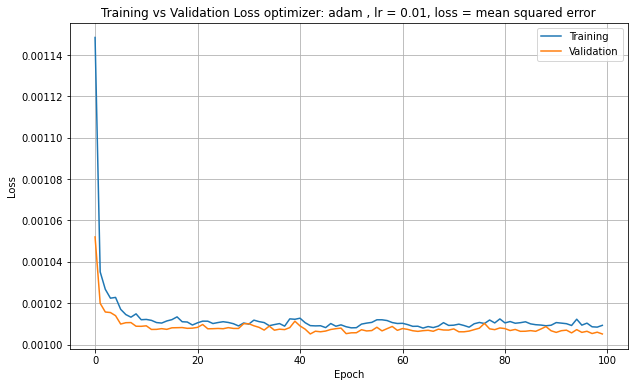

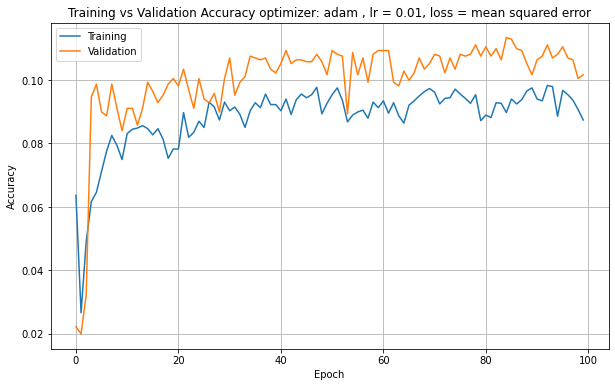

1720/1720 [==============================] - 0s 18us/step


[0.9025918525318767, 0.11220930516719818]

In [20]:
autoencoder_3 = KerasAutoencoder3(x_train_1.shape[1])
autoencoder_3.fit(x_train_1, x_train_1, w_train_1, x_val_1, x_val_1, w_val_1, 100)
autoencoder_3.plot_loss()
autoencoder_3.plot_acc()
autoencoder_3.model.evaluate(x_test_1, x_test_1, batch_size=128)

In [23]:
class KerasAutoencoder4(KerasModel):

    def __init__(self, n_features):
        input_layer = Input(shape=(n_features, ))
        encoder_1 = Dense(4, kernel_initializer='uniform',activation='relu')(input_layer)
        drop_1 = Dropout(rate=0.2)(encoder_1)
        encoder_2 = Dense(2, kernel_initializer='uniform',activation='relu')(drop_1)
        drop_2 = Dropout(rate=0.2)(encoder_2)
        decoder_2 = Dense(4, kernel_initializer='uniform',activation='relu')(drop_2)#drop_4)
        drop_5 = Dropout(rate=0.1)(decoder_2)
        output_layer = Dense(n_features, activation="sigmoid")(drop_5)
        self.model = Model(inputs=input_layer, outputs=output_layer)

        #compile
        self.model.compile(loss='mean_squared_error', optimizer=adam(lr=0.01), metrics = ["acc"])

        #title
        self.title = 'optimizer: adam , lr = 0.01, loss = mean squared error'

        #training
        self.history = None

        #name
        self.model_name = "KA4"

1s 113us/step - loss: 0.0010 - acc: 0.0852 - val_loss: 0.0010 - val_acc: 0.0470
Epoch 7/150
5138/5138 [==============================] - 1s 118us/step - loss: 0.0010 - acc: 0.0866 - val_loss: 0.0010 - val_acc: 0.0975
Epoch 8/150
5138/5138 [==============================] - 1s 111us/step - loss: 0.0010 - acc: 0.0769 - val_loss: 0.0010 - val_acc: 0.0928
Epoch 9/150
5138/5138 [==============================] - 1s 110us/step - loss: 0.0010 - acc: 0.0880 - val_loss: 0.0010 - val_acc: 0.0981
Epoch 10/150
5138/5138 [==============================] - 1s 110us/step - loss: 0.0010 - acc: 0.0878 - val_loss: 0.0010 - val_acc: 0.0940
Epoch 11/150
5138/5138 [==============================] - 1s 121us/step - loss: 0.0010 - acc: 0.0817 - val_loss: 0.0010 - val_acc: 0.0958
Epoch 12/150
5138/5138 [==============================] - 1s 152us/step - loss: 0.0010 - acc: 0.0800 - val_loss: 0.0010 - val_acc: 0.0964
Epoch 13/150
5138/5138 [==============================] - 1s 140us/step - loss: 0.0010 - acc: 0

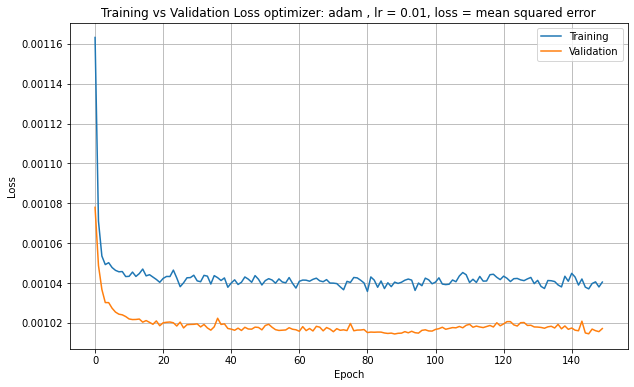

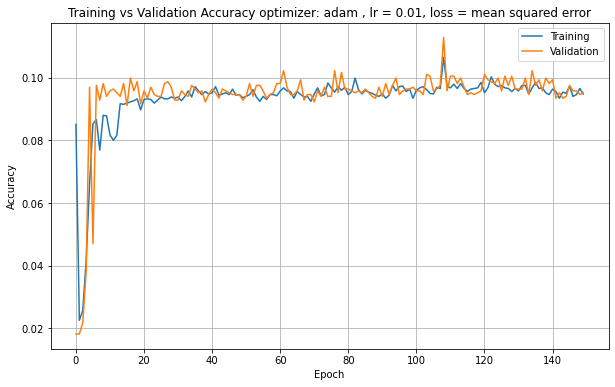

1720/1720 [==============================] - 0s 16us/step


[0.913996723086335, 0.11511627584695816]

In [24]:
autoencoder_4 = KerasAutoencoder4(x_train_1.shape[1])
autoencoder_4.fit(x_train_1, x_train_1, w_train_1, x_val_1, x_val_1, w_val_1, 150)
autoencoder_4.plot_loss()
autoencoder_4.plot_acc()
autoencoder_4.model.evaluate(x_test_1, x_test_1, batch_size=128)

In [27]:
class KerasAutoencoder5(KerasModel):

    def __init__(self, n_features):
        input_layer = Input(shape=(n_features, ))
        encoder_1 = Dense(8, kernel_initializer='uniform',activation='relu')(input_layer)
        drop_1 = Dropout(rate=0.2)(encoder_1)
        encoder_2 = Dense(2, kernel_initializer='uniform',activation='relu')(drop_1)
        drop_2 = Dropout(rate=0.2)(encoder_2)
        decoder_2 = Dense(8, kernel_initializer='uniform',activation='relu')(drop_2)#drop_4)
        drop_5 = Dropout(rate=0.1)(decoder_2)
        output_layer = Dense(n_features, activation="sigmoid")(drop_5)
        self.model = Model(inputs=input_layer, outputs=output_layer)

        #compile
        self.model.compile(loss='mean_squared_error', optimizer=adam(lr=0.01), metrics = ["acc"])

        #title
        self.title = 'optimizer: adam , lr = 0.01, loss = mean squared error'

        #training
        self.history = None

        #name
        self.model_name = "KA5"

: 0.2421
Epoch 15/150
5138/5138 [==============================] - 1s 118us/step - loss: 9.9494e-04 - acc: 0.2322 - val_loss: 9.5808e-04 - val_acc: 0.2656
Epoch 16/150
5138/5138 [==============================] - 1s 122us/step - loss: 9.9609e-04 - acc: 0.2411 - val_loss: 9.5829e-04 - val_acc: 0.2832
Epoch 17/150
5138/5138 [==============================] - 1s 119us/step - loss: 9.8938e-04 - acc: 0.2470 - val_loss: 9.6042e-04 - val_acc: 0.2344
Epoch 18/150
5138/5138 [==============================] - 1s 119us/step - loss: 9.8851e-04 - acc: 0.2456 - val_loss: 9.5789e-04 - val_acc: 0.2867
Epoch 19/150
5138/5138 [==============================] - 1s 117us/step - loss: 9.8871e-04 - acc: 0.2509 - val_loss: 9.5530e-04 - val_acc: 0.3008
Epoch 20/150
5138/5138 [==============================] - 1s 120us/step - loss: 9.8983e-04 - acc: 0.2577 - val_loss: 9.5332e-04 - val_acc: 0.2955
Epoch 21/150
5138/5138 [==============================] - 1s 119us/step - loss: 9.8875e-04 - acc: 0.2522 - val_loss

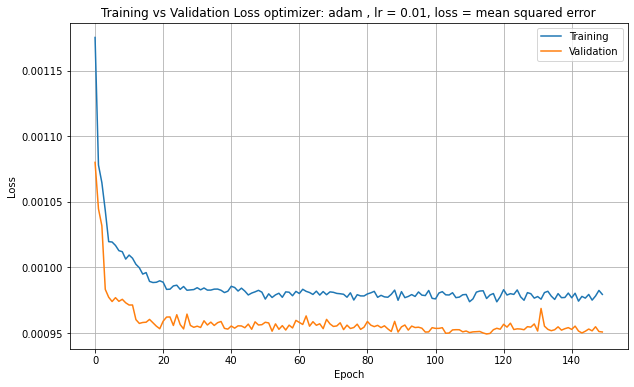

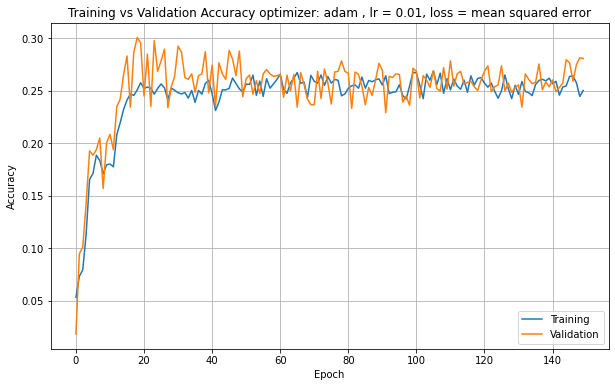

1720/1720 [==============================] - 0s 15us/step


[0.8541989351427832, 0.29593023657798767]

In [28]:
autoencoder_5 = KerasAutoencoder5(x_train_1.shape[1])
autoencoder_5.fit(x_train_1, x_train_1, w_train_1, x_val_1, x_val_1, w_val_1, 150)
autoencoder_5.plot_loss()
autoencoder_5.plot_acc()
autoencoder_5.model.evaluate(x_test_1, x_test_1, batch_size=128)